Homework

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# read the data
data = pd.read_csv('mushroom0_edible1_poison.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [8]:
data.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [9]:
data.tail()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1
54034,72,5,3,2,1.158311,492,12,0.888450,1


In [10]:
data.sample()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
2591,1385,6,2,10,1.244998,1732,11,0.88845,0


In [27]:
data.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [11]:
data.shape

(54035, 9)

In [12]:
X = data.drop(columns=['class'])
print("Shape of X = ",X.shape)

Shape of X =  (54035, 8)


In [13]:
y = data['class']
print("Shape of y = ",y.shape)

Shape of y =  (54035,)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import pickle

Dividing into 80-20 ratio

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Shape of X_train",X_train.shape)
print("Shape of y_train",y_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train (43228, 8)
Shape of y_train (43228,)
Shape of X_test (10807, 8)
Shape of y_test (10807,)


In [21]:
# kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_out = knn.predict(X_test)
print("Accuracy is ",accuracy_score(y_true=y_test, y_pred=y_out)*100,"%")

Accuracy is  71.89784399000648 %


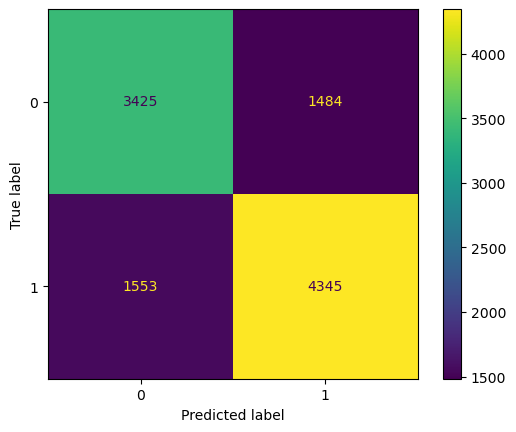

In [22]:
cm = confusion_matrix(y_true=y_test, y_pred=y_out)
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_plot.plot()
plt.savefig("cm-dtc1.png")

In [18]:
with open('model1.pkl', 'wb') as f:
    pickle.dump(knn, f)
print("SUCCESS!")

SUCCESS!


In [19]:
# Descision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_out = dtc.predict(X_test)
print("Accuracy is ",accuracy_score(y_true=y_test, y_pred=y_out)*100, '%')

Accuracy is  97.81623022115295 %


In [20]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_out = gnb.predict(X_test)
print("Accuracy is ",accuracy_score(y_true=y_test, y_pred=y_out)*100, '%')

Accuracy is  63.38484315721292 %


In [30]:
# ANN
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
y_out = mlp.predict(X_test)
print("Accuracy is ",accuracy_score(y_true=y_test, y_pred=y_out)*100, '%')

Accuracy is  75.9877856944573 %


In [31]:
# random forest
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_out = rf.predict(X_test)
print("Accuracy is ",accuracy_score(y_true=y_test, y_pred=y_out)*100, '%')

Accuracy is  99.08392708429722 %


random forest has the best score for this data set

In [32]:
with open('model2.pkl', 'wb') as f:
    pickle.dump(rf, f)
print("SUCCESS!")

SUCCESS!
